<a href="https://colab.research.google.com/github/me-smishra27/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/HEALTH INSURANCE CROSS SELL PREDICTION /TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
dataset = pd.read_csv(filepath)

In [ ]:
dataset.shape

(381109, 12)

In [ ]:
dataset['id'].nunique()

381109

In [ ]:
dataset.duplicated().value_counts()

False    381109
dtype: int64

In [ ]:
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df = pd.DataFrame(dataset.isnull().sum(), columns = ['MISSING COUNT'])

In [ ]:
df.T

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
MISSING COUNT,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head(20)

,MISSING COUNT
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
dataset.set_index('id', inplace= True)

In [ ]:
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
working_data = dataset.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
working_data['Gender'] = le.fit_transform(working_data['Gender'])
working_data['Vehicle_Damage'] = le.fit_transform(working_data['Vehicle_Damage'])

In [ ]:
working_data['Vehicle_Age_>2yrs'] = np.where(working_data['Vehicle_Age']== '> 2 Years', 1, 0)
working_data['Vehicle_Age_1-2yrs'] = np.where(working_data['Vehicle_Age']== '1-2 Year', 1, 0)
working_data['Vehicle_Age_<1yr'] = np.where(working_data['Vehicle_Age']=='< 1 Year', 1, 0)

In [ ]:
working_data.drop(['Vehicle_Age'], axis = 1, inplace = True)

In [ ]:
working_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_>2yrs,Vehicle_Age_1-2yrs,Vehicle_Age_<1yr
id,,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,1,0,0
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,1,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,1,0,0
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,0,1
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,0,1


In [ ]:
working_data.drop(['Region_Code', 'Policy_Sales_Channel'], axis = 1, inplace = True)

In [ ]:
working_data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_>2yrs,Vehicle_Age_1-2yrs,Vehicle_Age_<1yr
id,,,,,,,,,,,
1,1,44,1,0,1,40454.0,217,1,1,0,0
2,1,76,1,0,0,33536.0,183,0,0,1,0
3,1,47,1,0,1,38294.0,27,1,1,0,0
4,1,21,1,1,0,28619.0,203,0,0,0,1
5,0,29,1,1,0,27496.0,39,0,0,0,1


In [ ]:
working_data.drop_duplicates(inplace = True)

In [ ]:
pd.crosstab(['Response'], working_data['Gender'], margins = True)

Gender,0,1,All
row_0,,,
Response,168478,196789,365267
All,168478,196789,365267


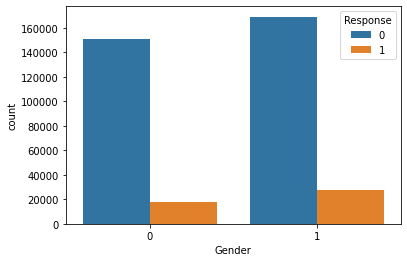

In [ ]:
sns.countplot(x = 'Gender', hue= 'Response', data = working_data)

In [ ]:
dataset.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
print(dataset['Policy_Sales_Channel'].nunique())
print(dataset['Policy_Sales_Channel'].unique())

155
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  58.
  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.  79.
 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144. 143.
  41.]


In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(dataset, hue = 'Response', vars =['Age', 'Annual_Premium', 'Vintage'])

In [ ]:
X = working_data.drop(['Response'], axis = 1)
Y = working_data['Response']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(255686, 10)
(109581, 10)


In [ ]:
working_data.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response',
       'Vehicle_Age_>2yrs', 'Vehicle_Age_1-2yrs', 'Vehicle_Age_<1yr'],
      dtype='object')

In [ ]:
col = ['Age', 'Annual_Premium', 'Vintage']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[col] = sc.fit_transform(X_train[col])
X_test[col] = sc.transform(X_test[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dat_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30, random_state=0)
dat_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predicted = dat_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

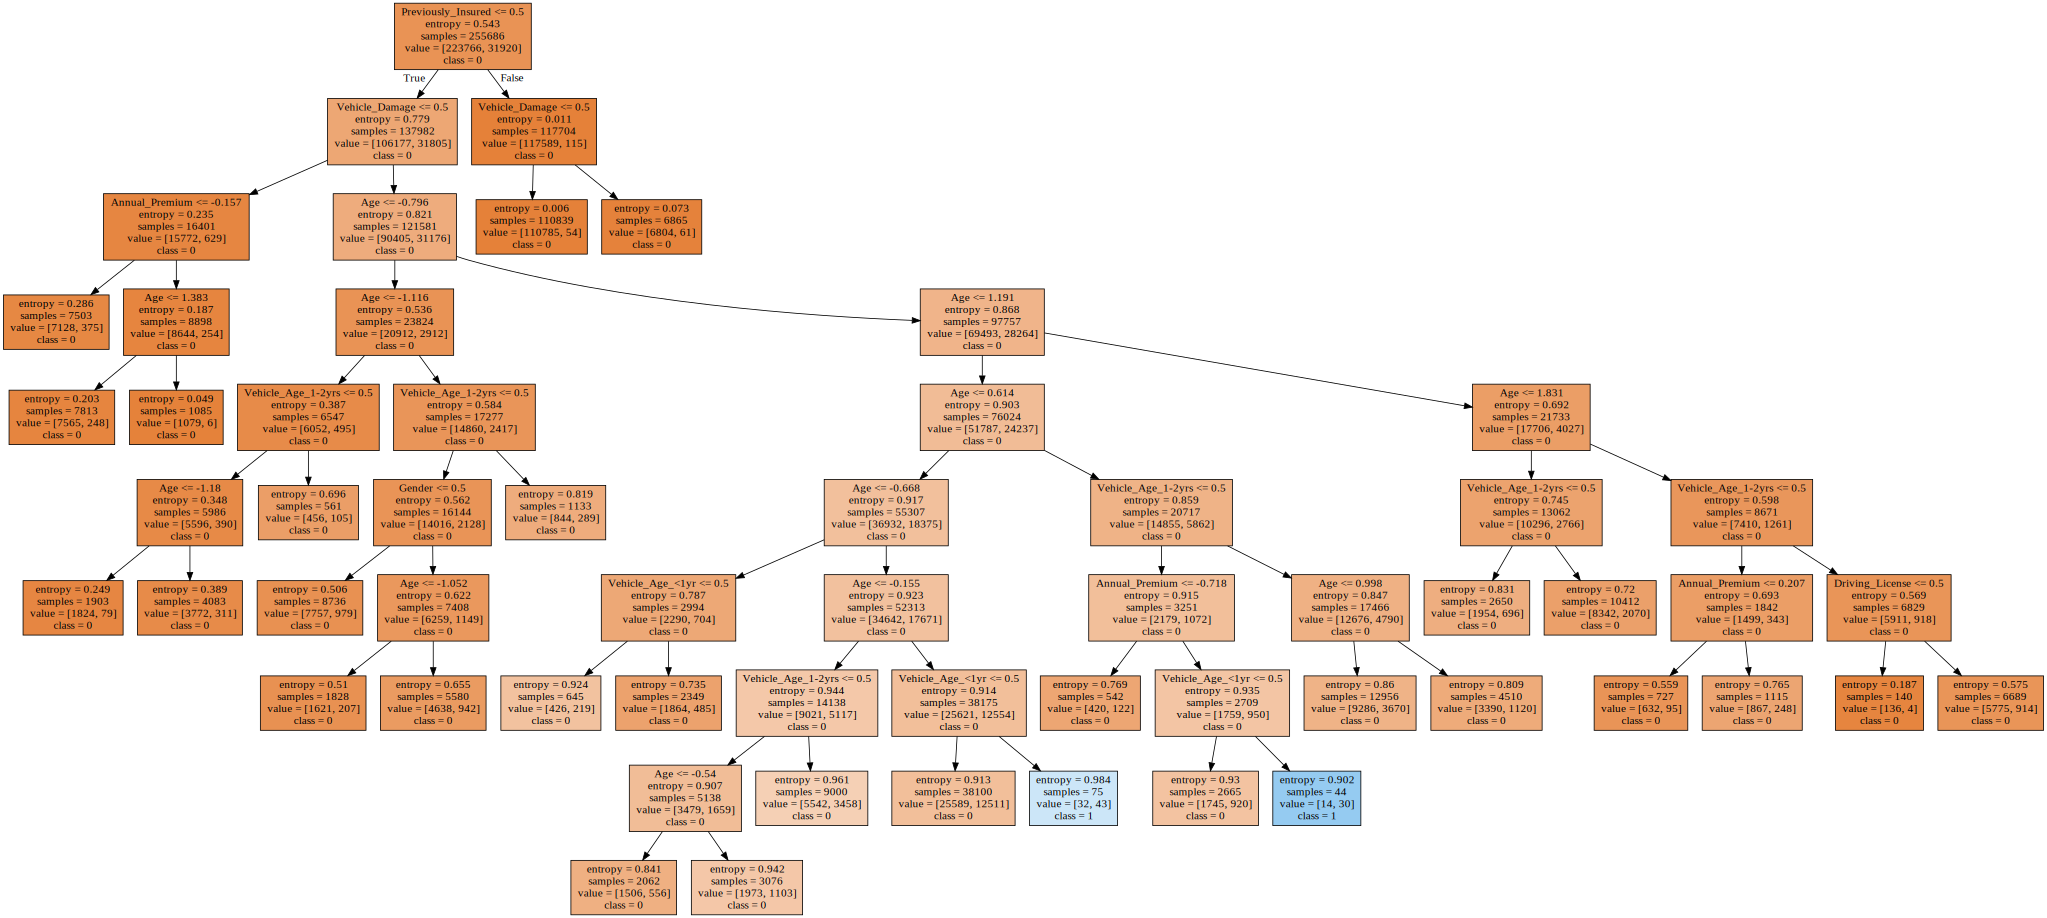

In [ ]:
graph = Source(tree.export_graphviz(dat_classifier, out_file=None
   , feature_names=X.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
accuracy_score(y_test, y_predicted) * 100

87.4321278323797

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[ 0.10945843, -0.34719324,  1.07752859, -3.88976919,  2.06043204,
         0.00788929, -0.00698598,  0.56183256,  0.36933655, -0.8725858 ]])

In [ ]:
clf.intercept_

array([-4.29212718])

In [ ]:
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
test_preds

array([[9.95994996e-01, 4.00500425e-03],
       [9.99459731e-01, 5.40268610e-04],
       [9.99570923e-01, 4.29077247e-04],
       ...,
       [9.99509875e-01, 4.90125431e-04],
       [9.99443621e-01, 5.56379435e-04],
       [7.85375028e-01, 2.14624972e-01]])

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
test_preds

array([0.004005  , 0.00054027, 0.00042908, ..., 0.00049013, 0.00055638,
       0.21462497])

In [ ]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8751593751711083
The accuracy on test data is  0.874293901315009


[[223766      0]
 [ 31920      0]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not-Interested')]

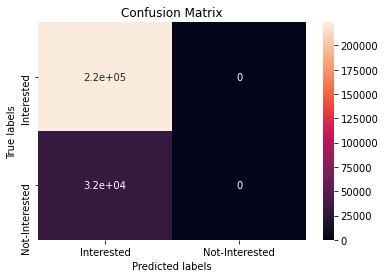

In [ ]:
labels = ['Interested', 'Not-Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[95806     0]
 [13775     0]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not-Interested')]

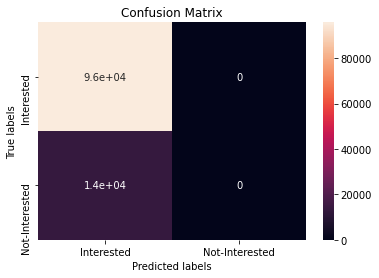

In [ ]:
labels = ['Interested', 'Not-Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 50, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.5s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.6s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.8s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.9s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.9s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   27.9s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   32.2s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.2s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   36.4s remaining:    0.0s


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.9s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   2.6s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.2s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.4s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.6s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.6s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.3s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.6s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.2s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.5s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.3s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.4s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.2s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   2.4s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.6s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.5s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.8s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.8s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.8s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.6s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.6s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.1s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.3s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.2s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.9s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.5s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   3.5s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.1s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.875, test=0.875), total=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


In [ ]:
scores['train_accuracy']

array([0.87515764, 0.87515764, 0.87515764, 0.87515764, 0.87515764,
       0.87515764, 0.87515764, 0.87515764, 0.87515764, 0.87515764,
       0.87515764, 0.87515764, 0.87515764, 0.87515764, 0.87515764,
       0.87515764, 0.87516163, 0.87516163, 0.87516163, 0.87516163,
       0.87516163, 0.87516163, 0.87516163, 0.87516163, 0.87516163,
       0.87516163, 0.87516163, 0.87516163, 0.87516163, 0.87516163,
       0.87516163, 0.87516163, 0.87516163, 0.87516163, 0.87516163,
       0.87516163, 0.87515814, 0.87515814, 0.87515814, 0.87515814,
       0.87515814, 0.87515814, 0.87515814, 0.87515814, 0.87515814,
       0.87515814, 0.87515814, 0.87515814, 0.87515814, 0.87515814])

In [ ]:
scores['test_accuracy']

array([0.87524443, 0.87524443, 0.87524443, 0.87524443, 0.87524443,
       0.87524443, 0.87524443, 0.87524443, 0.87524443, 0.87524443,
       0.87524443, 0.87524443, 0.87524443, 0.87524443, 0.87524443,
       0.87524443, 0.87504889, 0.87504889, 0.87504889, 0.87504889,
       0.87504889, 0.87504889, 0.87504889, 0.87504889, 0.87504889,
       0.87504889, 0.87504889, 0.87504889, 0.87504889, 0.87504889,
       0.87504889, 0.87504889, 0.87504889, 0.87504889, 0.87504889,
       0.87504889, 0.87522003, 0.87522003, 0.87522003, 0.87522003,
       0.87522003, 0.87522003, 0.87522003, 0.87522003, 0.87522003,
       0.87522003, 0.87522003, 0.87522003, 0.87522003, 0.87522003])

In [ ]:
working_data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_>2yrs,Vehicle_Age_1-2yrs,Vehicle_Age_<1yr
id,,,,,,,,,,,
1,1,44,1,0,1,40454.0,217,1,1,0,0
2,1,76,1,0,0,33536.0,183,0,0,1,0
3,1,47,1,0,1,38294.0,27,1,1,0,0
4,1,21,1,1,0,28619.0,203,0,0,0,1
5,0,29,1,1,0,27496.0,39,0,0,0,1


In [ ]:
filepath_new = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/HEALTH INSURANCE CROSS SELL PREDICTION /processed_data.csv'
work_df = pd.read_csv(filepath_new)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(work_df.iloc[:,0:-1], work_df['Response'])

print('Original dataset shape', len(work_df))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 381109
Resampled dataset shape 668798


In [ ]:
x_smote

array([[1.00000000e+00, 1.00000000e+00, 4.40000000e+01, ...,
        2.17000000e+02, 1.00000000e+00, 1.99385194e-01],
       [2.00000000e+00, 1.00000000e+00, 7.60000000e+01, ...,
        1.83000000e+02, 0.00000000e+00, 1.99385194e-01],
       [3.00000000e+00, 1.00000000e+00, 4.70000000e+01, ...,
        2.70000000e+01, 1.00000000e+00, 1.99385194e-01],
       ...,
       [2.18829774e+05, 0.00000000e+00, 3.88824384e+01, ...,
        3.06342545e+01, 1.00000000e+00, 1.99385194e-01],
       [3.70570461e+05, 4.32865396e-01, 4.74488851e+01, ...,
        1.17220479e+02, 1.00000000e+00, 2.38375813e-01],
       [1.01493405e+05, 1.02223325e-01, 3.82044466e+01, ...,
        2.90182213e+02, 1.00000000e+00, 1.89147915e-01]])

In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop(-3)

'Response'

In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['Response'] = y_smote


In [ ]:
balance_df.drop(['id'], axis = 1, inplace = True)

In [ ]:
balance_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Policy_Sales_Channel_Target_encoded,Region_Code_Target_encoded,Response
0,1.000000,44.000000,1.0,28.000000,0.0,2.5,1.0,40454.000000,26.000000,217.000000,1.0,0.199385,1
1,1.000000,76.000000,1.0,3.000000,0.0,1.5,0.0,33536.000000,26.000000,183.000000,0.0,0.199385,0
2,1.000000,47.000000,1.0,28.000000,0.0,2.5,1.0,38294.000000,26.000000,27.000000,1.0,0.199385,1
3,1.000000,21.000000,1.0,11.000000,1.0,0.5,0.0,28619.000000,152.000000,203.000000,0.0,0.028624,0
4,0.000000,29.000000,1.0,41.000000,1.0,0.5,0.0,27496.000000,152.000000,39.000000,0.0,0.028624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668793,1.000000,48.854114,1.0,49.241393,0.0,1.5,1.0,34471.856642,29.472087,261.273294,1.0,0.197424,1
668794,0.661161,43.016517,1.0,34.140636,0.0,1.5,1.0,23500.444506,112.612094,51.883898,1.0,0.245017,1
668795,0.000000,38.882438,1.0,25.793904,0.0,1.5,1.0,37459.447023,26.000000,30.634254,1.0,0.199385,1
668796,0.432865,47.448885,1.0,48.865731,0.0,1.5,1.0,2630.000000,156.432865,117.220479,1.0,0.238376,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


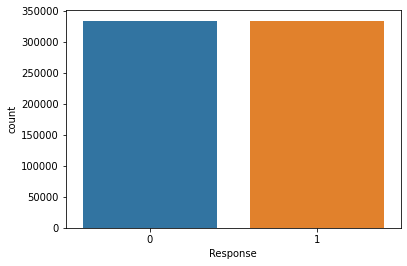

In [ ]:
sns.countplot('Response', data = balance_df)

In [ ]:
df_log_reg = balance_df.copy()

In [ ]:
X = df_log_reg.drop(['Response'], axis = 1)
y = df_log_reg['Response']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
col = ['Age', 'Annual_Premium', 'Vintage']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[col] = sc.fit_transform(X_train[col])
X_test[col] = sc.transform(X_test[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   58.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_

In [ ]:
grid_lr_clf.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_

1.0

In [ ]:
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on train data is ", test_roc_score_lr)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on train data is  1.0


[[224047      0]
 [     0 224047]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

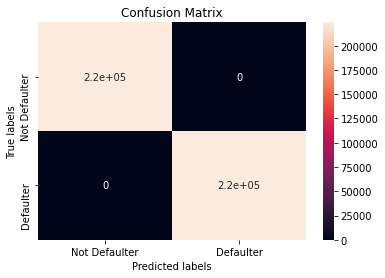

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#Random Forest

In [ ]:
df_fr = balance_df.copy()

In [ ]:
X = df_fr.drop(['Response'],axis=1)
y = df_fr['Response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)